# Frequency Landscape

In [25]:
import json
import plotly.graph_objects as go

with open("../parameters.json") as f:
    params = json.load(f)

qubit_dict = {}

readout_modules = [["qrm_rf0", "o1"]]*4
drive_modules = [["qcm_rf0", "o1"],["qcm_rf0", "o2"],["qcm_rf1", "o1"],["qcm_rf1", "o2"]]

for qubit in params["qubits"]:
    qubit_info = params["characterization"]["single_qubit"][str(qubit)]
    gate_info = params["native_gates"]["single_qubit"][str(qubit)]
    control_module = params["instruments"][drive_modules[qubit][0]][drive_modules[qubit][1]]
    ro_module = params["instruments"][readout_modules[qubit][0]][readout_modules[qubit][1]]
    qubit_dict[qubit] = {
        "readout": {
            "readout_frequency": gate_info["MZ"].get("frequency"),
            "bare_resonator_frequency": qubit_info.get("bare_resonator_frequency"),
            "dressed_resonator_frequency": qubit_info.get("readout_frequency"),
            "lo_readout": ro_module.get("lo_frequency")
        },
        "control" : {
            "drive_frequency": gate_info["RX"].get("frequency"),
            "12_frequency": gate_info["RX12"].get("frequency"),
            "02_frequency": (2*gate_info["RX12"].get("frequency")+qubit_info.get("anharmonicity"))/2 if gate_info["RX12"].get("frequency") and qubit_info.get("anharmonicity") else None,
            "lo_control": control_module.get("lo_frequency")
        }
    }

print(qubit_dict)

{0: {'readout': {'readout_frequency': 6082033600, 'bare_resonator_frequency': 6080315531, 'dressed_resonator_frequency': 6083704041, 'lo_readout': 6330000000.0}, 'control': {'drive_frequency': 3103356879, '12_frequency': 2807519325, '02_frequency': 2659600548.0, 'lo_control': 3360000000.0}}, 1: {'readout': {'readout_frequency': 6219246890, 'bare_resonator_frequency': 6216101598, 'dressed_resonator_frequency': 6219246890, 'lo_readout': 6330000000.0}, 'control': {'drive_frequency': 3200000000.0, '12_frequency': None, '02_frequency': None, 'lo_control': 3350000000.0}}, 2: {'readout': {'readout_frequency': 6373363437, 'bare_resonator_frequency': 6370427438, 'dressed_resonator_frequency': 6373363437, 'lo_readout': 6330000000.0}, 'control': {'drive_frequency': 3686887952, '12_frequency': None, '02_frequency': None, 'lo_control': 3600000000.0}}, 3: {'readout': {'readout_frequency': 6494812210, 'bare_resonator_frequency': 6492224944, 'dressed_resonator_frequency': 6494812210, 'lo_readout': 633

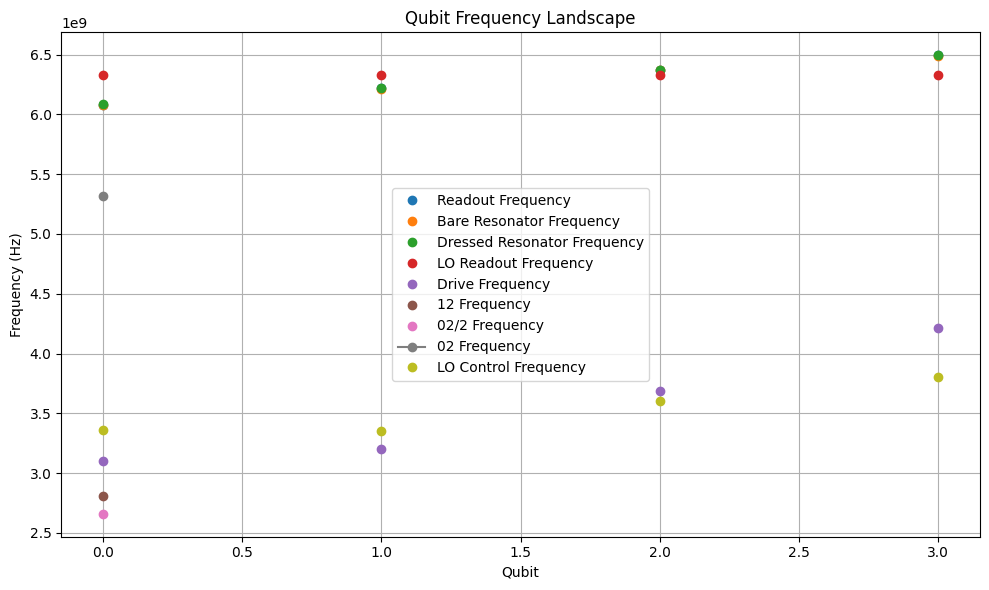

In [26]:
import matplotlib.pyplot as plt

# Prepare lists for plotting
qubits = list(qubit_dict.keys())
readout_freqs = [qubit_dict[q]["readout"]["readout_frequency"] for q in qubits]
bare_resonator_freqs = [qubit_dict[q]["readout"]["bare_resonator_frequency"] for q in qubits]
dressed_resonator_freqs = [qubit_dict[q]["readout"].get("dressed_resonator_frequency") for q in qubits]
lo_readout_freqs = [qubit_dict[q]["readout"].get("lo_readout") for q in qubits]

drive_freqs = [qubit_dict[q]["control"]["drive_frequency"] for q in qubits]
freq_12 = [qubit_dict[q]["control"]["12_frequency"] for q in qubits]
freq_02 = [qubit_dict[q]["control"].get("02_frequency") for q in qubits]
lo_control_freqs = [qubit_dict[q]["control"].get("lo_control") for q in qubits]

plt.figure(figsize=(10,6))

# Readout frequencies
plt.plot(qubits, readout_freqs, 'o', label='Readout Frequency')
plt.plot(qubits, bare_resonator_freqs, 'o', label='Bare Resonator Frequency')
if any(dressed_resonator_freqs):
    plt.plot(qubits, dressed_resonator_freqs, 'o', label='Dressed Resonator Frequency')
if any(lo_readout_freqs):
    plt.plot(qubits, lo_readout_freqs, 'o', label='LO Readout Frequency')

# Control frequencies
plt.plot(qubits, drive_freqs, 'o', label='Drive Frequency')
plt.plot(qubits, freq_12, 'o', label='12 Frequency')
if any(freq_02):
    plt.plot(qubits, freq_02, 'o', label='02/2 Frequency')
    plt.plot(qubits, [f * 2 if f is not None else None for f in freq_02], 'o-', label='02 Frequency')
if any(lo_control_freqs):
    plt.plot(qubits, lo_control_freqs, 'o', label='LO Control Frequency')

plt.title('Qubit Frequency Landscape')
plt.xlabel('Qubit')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()